## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#### Set module features
%matplotlib inline
sns.set(color_codes=True)

In [2]:
# Load Data
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Drop ID and ZIP Code
cr_df = df.drop(['ID','ZIP Code'], axis =1 )
cr_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
#shape ane describe
print( f'Df size = {cr_df.shape}')
cr_df.info()

Df size = (5000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [5]:
#missing
print( f'Is Nan count ? \n{cr_df.isna().sum()}') # none missing

Is Nan count ? 
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [6]:
#column sets
df_cols  = set(cr_df.columns)
df_cols_boolean  = {'Personal Loan','Securities Account','CD Account','Online','CreditCard'}
df_cols_numeric  = {'Income',  'Family',  'CCAvg', 'Age', 'Experience','Mortgage'}
df_cols_category  = {'Education'}

print(f'*All[{len(df_cols)}] {df_cols}\n')
print(f'*Boolean[{len(df_cols_boolean)}] {df_cols_boolean}\n')
print(f'*Numeric[{len(df_cols_numeric)}] {df_cols_numeric}\n')
print(f'*Categoty[{len(df_cols_category)}] {df_cols_category}\n')  # Family is category or ordinal?



*All[12] {'Experience', 'CD Account', 'Online', 'Education', 'Family', 'Mortgage', 'Income', 'Personal Loan', 'Securities Account', 'CreditCard', 'CCAvg', 'Age'}

*Boolean[5] {'CD Account', 'Online', 'Personal Loan', 'Securities Account', 'CreditCard'}

*Numeric[6] {'Experience', 'Family', 'Mortgage', 'Income', 'CCAvg', 'Age'}

*Categoty[1] {'Education'}



In [7]:
# Check category
for x in df_cols_category:
    cr_df[x]=cr_df[x].astype('category')
    print( f'Unique values for {x} :\n{cr_df[x].value_counts()}\n')


Unique values for Education :
1    2096
3    1501
2    1403
Name: Education, dtype: int64



In [8]:
# Check boolean
for x in df_cols_boolean:
    print( f'Unique values for {x} :\n{cr_df[x].value_counts(normalize= True)}\n')

#very few Securities Account, CD Account

Unique values for CD Account :
0    0.9396
1    0.0604
Name: CD Account, dtype: float64

Unique values for Online :
1    0.5968
0    0.4032
Name: Online, dtype: float64

Unique values for Personal Loan :
0    0.904
1    0.096
Name: Personal Loan, dtype: float64

Unique values for Securities Account :
0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

Unique values for CreditCard :
0    0.706
1    0.294
Name: CreditCard, dtype: float64



In [9]:
#Numeric 
print( f'\nNumeric \n{cr_df[df_cols_numeric].describe().T}')

#Fixing experience Experience is negative 
print(cr_df[cr_df.Experience <0].shape)

#It seems like negative experience all other data is correct , so I will replace negative with 0
cr_df['Experience'] = cr_df.Experience.map( lambda x: 0 if x<0 else x )
print( f'\nExpereince Fixed\n{cr_df.Experience.describe()}')

#checking any record with experience > Age
print(f'\nRecords with Expereince > Age {cr_df[cr_df.Experience >= cr_df.Age].shape}')


Numeric 
             count       mean         std   min   25%   50%    75%    max
Experience  5000.0  20.104600   11.467954  -3.0  10.0  20.0   30.0   43.0
Family      5000.0   2.396400    1.147663   1.0   1.0   2.0    3.0    4.0
Mortgage    5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0  635.0
Income      5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0  224.0
CCAvg       5000.0   1.937938    1.747659   0.0   0.7   1.5    2.5   10.0
Age         5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   67.0
(52, 12)

Expereince Fixed
count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

Records with Expereince > Age (0, 12)


In [10]:
#Family
cr_df['Family'].value_counts(normalize=True)

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

In [11]:
#Education
cr_df['Education'].value_counts(normalize=True)

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

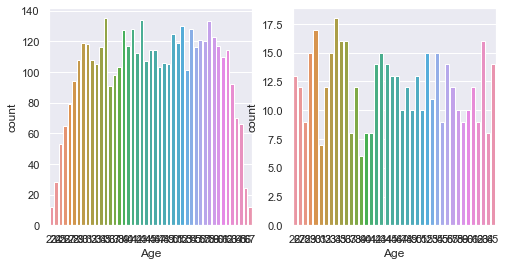

In [12]:
#Age
fix , axs = plt.subplots(1,2,figsize=(8,4))
sns.countplot(cr_df[cr_df['Personal Loan']==0]['Age'], ax = axs[0])
sns.countplot(cr_df[cr_df['Personal Loan']==1]['Age'], ax = axs[1])

## 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

* Number of unique in each column?
* Number of people with zero mortgage?
* Number of people with zero credit card spending per month?
* Value counts of all categorical columns.
* Univariate and Bivariate
* Get data model ready

In [13]:
# Number of unique in each column?
#Value counts of all categorical columns.

for x in df_cols_category:
    cr_df[x]=cr_df[x].astype('category')
    print( f'Unique values for {x} :\n{cr_df[x].value_counts()}\n')
    
cr_df['Family'].value_counts(normalize=True)

for x in df_cols_boolean:
    print( f'Unique values for {x} :\n{cr_df[x].value_counts(normalize= True)}\n')



Unique values for Education :
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Unique values for CD Account :
0    0.9396
1    0.0604
Name: CD Account, dtype: float64

Unique values for Online :
1    0.5968
0    0.4032
Name: Online, dtype: float64

Unique values for Personal Loan :
0    0.904
1    0.096
Name: Personal Loan, dtype: float64

Unique values for Securities Account :
0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

Unique values for CreditCard :
0    0.706
1    0.294
Name: CreditCard, dtype: float64




Mortgage =0 => 3462


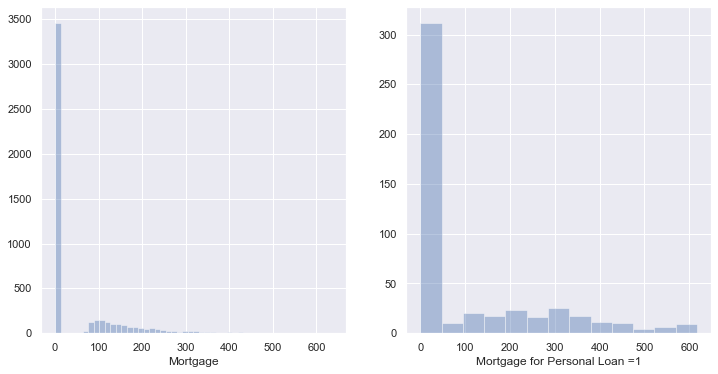

In [14]:
# Number of people with zero mortgage?
df_mort_zero = cr_df[cr_df.Mortgage ==0]
print( f'\nMortgage =0 => {df_mort_zero.shape[0]}')
fig, axs = plt.subplots(1,2, figsize=(12,6))
sns.distplot(cr_df.Mortgage, kde=False , ax = axs[0])
sns.distplot(cr_df.Mortgage[ cr_df['Personal Loan']==1], kde=False , ax = axs[1])
axs[1].set_xlabel('Mortgage for Personal Loan =1')
plt.show()



CCAvg =0 => 106


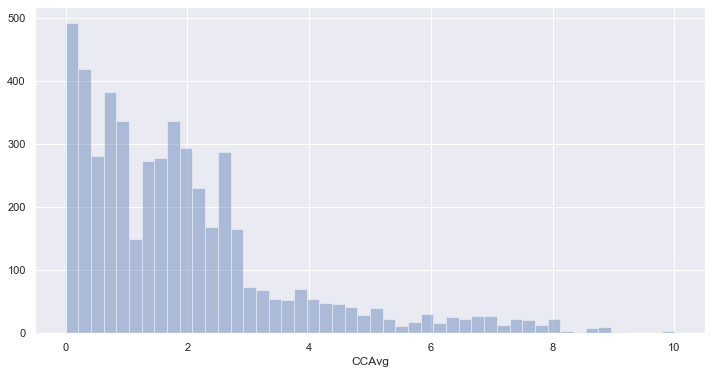

In [15]:
#Number of people with zero credit card spending per month?
df_ccavg_zero = cr_df[cr_df.CCAvg ==0]
print( f'\nCCAvg =0 => {df_ccavg_zero.shape[0]}')
fig, axs = plt.subplots(1,1, figsize=(12,6))
sns.distplot(cr_df.CCAvg, kde=False , ax = axs)
plt.show()


In [16]:
# Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
print(cr_df.groupby(["Personal Loan"])[list(df_cols_numeric)].mean())
print()

# Age , Experience, Family do not seem to be the discriminating variables

for x in df_cols_boolean -{'Personal Loan'}:
    print(cr_df.groupby(["Personal Loan", x])[x].count())
    print()

# seems like not having a Securities Account, makes personal loan more appealing

               Experience    Family    Mortgage      Income     CCAvg  \
Personal Loan                                                           
0               20.148894  2.373451   51.789381   66.237389  1.729009   
1               19.843750  2.612500  100.845833  144.745833  3.905354   

                     Age  
Personal Loan             
0              45.367257  
1              45.066667  

Personal Loan  Securities Account
0              0                     4058
               1                      462
1              0                      420
               1                       60
Name: Securities Account, dtype: int64

Personal Loan  Online
0              0         1827
               1         2693
1              0          189
               1          291
Name: Online, dtype: int64

Personal Loan  CD Account
0              0             4358
               1              162
1              0              340
               1              140
Name: CD Account, dtype:

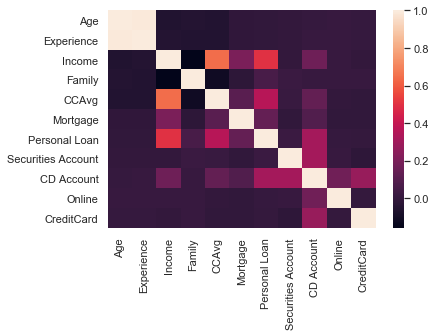

In [17]:
# correlation
corr = cr_df.corr()
sns.heatmap(corr)
plt.show()


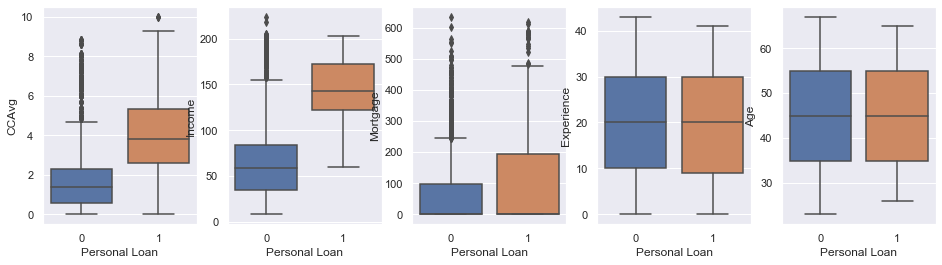

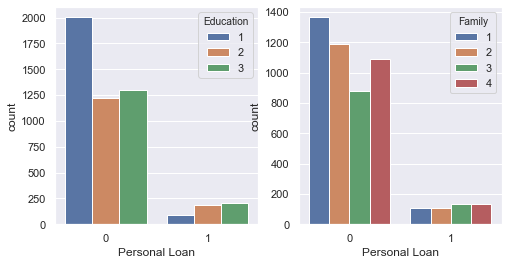

In [18]:
# Here I will just study the distribution for people who got loan and who didnt

fig, axs = plt.subplots(1,5,figsize=(16,4))
sns.boxplot(y = cr_df.CCAvg , x = cr_df['Personal Loan'], ax = axs[0])
sns.boxplot(y = cr_df.Income , x = cr_df['Personal Loan'], ax = axs[1])
sns.boxplot(y = cr_df.Mortgage        , x = cr_df['Personal Loan'], ax = axs[2])
sns.boxplot(y = cr_df.Experience      , x = cr_df['Personal Loan'], ax = axs[3])
sns.boxplot(y = cr_df.Age      , x = cr_df['Personal Loan'], ax = axs[4])
plt.show()


fig, axs = plt.subplots(1,2,figsize=(8,4))
sns.countplot(x = cr_df['Personal Loan'],hue =cr_df['Education'], ax = axs[0])
sns.countplot(x = cr_df['Personal Loan'],hue =cr_df['Family'], ax = axs[1])

plt.show()


In [19]:
# Get data model ready
# preparing x , y 

#for education I need to add dummies
dfmodel = pd.concat( [cr_df , pd.get_dummies(cr_df['Education'], prefix = 'Edu', drop_first = True)], axis = 1)
dfmodel.drop('Education', axis =1 , inplace= True)

y = dfmodel['Personal Loan']
x = dfmodel.drop('Personal Loan', axis = 1)



##  3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [20]:
#split data 
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.3 , random_state = 7)


## 4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks)

In [21]:
# create model
logreg = LogisticRegression(random_state=42, solver = 'liblinear')
logreg.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
#predict probability
y_probability = logreg.predict_proba(x_test,)[:,np.where(logreg.classes_ ==1)[0][0]] # get the true 
y_predict = logreg.predict(x_test)

In [23]:
# display model

# function to get confusion matrix in a proper format
def draw_cm( actual, predicted , ax):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] , ax = ax )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
   
    
#AUC ROC curve
def draw_roc(model , x_test , y_test , y_predict , y_proba , ax):
    logit_roc_auc = roc_auc_score(y_test, y_predict)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
def display_model( displaygraph ,model , x_test , y_test, x_train , y_train, y_predict, y_proba , d):
    
    if displaygraph:
        fig , axs = plt.subplots(1,2,figsize=(10,4))
        draw_cm(y_test,y_predict , axs[0])
        draw_roc(model , x_test , y_test, y_predict, y_proba, axs[1] )
        plt.show()
        print()
    d["Trainig accuracy"]=model.score(x_train,y_train)
    d["Testing accuracy"]=model.score(x_test, y_test)
    d["Recall"]=recall_score(y_test,y_predict) # tp/(tp+fn)
    d["Precision"]=precision_score(y_test,y_predict) # tp/(tp+fp)
    d["F1 Score"]=f1_score(y_test,y_predict)
    d["Roc Auc Score"]=roc_auc_score(y_test,y_predict)
    
#displaying  for a model
def get_model_params(model):
    d={}
    p = model.get_params()
    d['C'] =p['C']
    d['solver'] =p['solver']
    d['penalty'] =p['penalty']
    return d



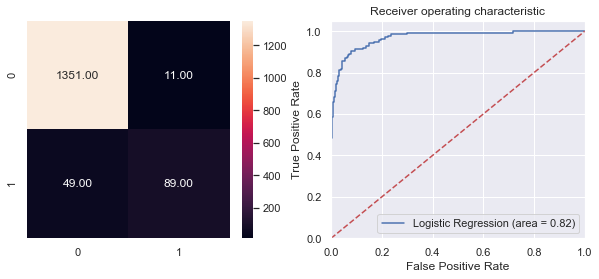


{'C': 1.0, 'solver': 'liblinear', 'penalty': 'l2', 'Trainig accuracy': 0.9562857142857143, 'Testing accuracy': 0.96, 'Recall': 0.644927536231884, 'Precision': 0.89, 'F1 Score': 0.7478991596638656, 'Roc Auc Score': 0.8184255889676308}


,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Edu_2,Edu_3,intercept
OLD,-0.368752,0.372954,0.050974,0.619706,0.149891,0.00073,-0.511391,2.937211,-0.632602,-0.863709,3.16913,3.408929,-2.243679


In [24]:
# Display all the parameters 
d= get_model_params(logreg)
display_model(True, logreg , x_test , y_test, x_train , y_train, y_predict, y_probability,d)
print(d)

dfmodel_stats = pd.DataFrame(logreg.coef_, index=['OLD'])
dfmodel_stats.columns = x_train.columns
dfmodel_stats['intercept'] = logreg.intercept_[0]
dfmodel_stats

## Give your reasoning on how can the model perform better? (10 marks)
Hint: Check parameter

In [25]:
#fine tune params and build a display data frame
#using different penalty , solver and C
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
C = [0.01,0.1,0.25,0.5,0.75,1]
penalty = ['l1', 'l2']

model_df = pd.DataFrame()
for s in solver:
    for p in penalty:
        proceed = True
        if p == 'l1':
            proceed = s in ['saga', 'liblinear']
        
        if proceed:
            for c in C:
                model = LogisticRegression(C=c,random_state=42,penalty=p,solver=s)
                model.fit(x_train, y_train)
                y_probability_1 = model.predict_proba(x_test,)[:,np.where(model.classes_ ==1)[0][0]] # get the true 
                y_predict_1 = model.predict(x_test)
                d= get_model_params(model)
                display_model(False, model , x_test , y_test, x_train , y_train, y_predict_1, y_probability_1,d)
                model_df =model_df.append(d,ignore_index=True)

model_df.sort_values(by=['Testing accuracy'], inplace=True, ascending=False)
model_df.head(5)

,C,F1 Score,Precision,Recall,Roc Auc Score,Testing accuracy,Trainig accuracy,penalty,solver
16,0.75,0.758333,0.892157,0.659420,0.825672,0.961333,0.957143,l1,liblinear
15,0.50,0.758333,0.892157,0.659420,0.825672,0.961333,0.956286,l1,liblinear
17,1.00,0.755187,0.883495,0.659420,0.825305,0.960667,0.956857,l1,liblinear
22,0.75,0.751055,0.898990,0.644928,0.818793,0.960667,0.956571,l2,liblinear
5,1.00,0.756098,0.861111,0.673913,0.831450,0.960000,0.957714,l2,newton-cg


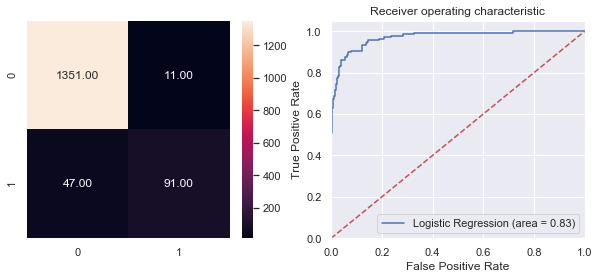


{'C': 0.75, 'solver': 'liblinear', 'penalty': 'l1', 'Trainig accuracy': 0.9571428571428572, 'Testing accuracy': 0.9613333333333334, 'Recall': 0.6594202898550725, 'Precision': 0.8921568627450981, 'F1 Score': 0.7583333333333333, 'Roc Auc Score': 0.825671965779225}


In [26]:
# The best model is liblinear l1 0.75
# Printing the details of Best Model
best_model =LogisticRegression(C=0.75,random_state=42,penalty='l1',solver='liblinear')
best_model.fit(x_train, y_train)
y_probability_best = best_model.predict_proba(x_test,)[:,np.where(best_model.classes_ ==1)[0][0]] # get the true 
y_predict_best = best_model.predict(x_test)

d_best= get_model_params(best_model)
display_model(True, best_model , x_test , y_test, x_train , y_train, y_predict_best, y_probability_best,d_best)
print(d_best)


In [27]:
#comparing OLD and BEST model
dfmodel_stats = pd.DataFrame()
series = pd.Series(best_model.coef_[0],index = x_train.columns, name='BEST')
dfmodel_stats = dfmodel_stats.append( series , ignore_index=False)
dfmodel_stats['intercept'] = best_model.intercept_[0]

series = pd.Series(logreg.coef_[0],index = x_train.columns, name='OLD')
dfmodel_stats = dfmodel_stats.append( series , ignore_index=False)
dfmodel_stats.loc['OLD']['intercept'] = logreg.intercept_[0]

dfmodel_stats.head().T


,BEST,OLD
Age,-0.206451,-0.368752
CCAvg,0.156223,0.149891
CD Account,3.100361,2.937211
CreditCard,-0.870193,-0.863709
Edu_2,3.429290,3.169130
Edu_3,3.626777,3.408929
Experience,0.212547,0.372954
Family,0.632695,0.619706
Income,0.053334,0.050974
Mortgage,0.000763,0.000730


## Give Business understanding of your model? (5 marks)